Sentiment Analysis Portion for the top 50 anime reviews/ 100 reviews per anime

In [1]:
#import files
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Mounted at /content/drive


In [2]:
reviews = pd.read_csv('/content/drive/MyDrive/4120project/anime_reviews.csv')
print(reviews.head(10))
print(f'Shape:{reviews.shape}')
print(reviews.info())

                title  rank  score             tags  \
0  Shingeki_no_Kyojin     1   8.54      Recommended   
1  Shingeki_no_Kyojin     1   8.54      Recommended   
2  Shingeki_no_Kyojin     1   8.54   Mixed Feelings   
3  Shingeki_no_Kyojin     1   8.54      Recommended   
4  Shingeki_no_Kyojin     1   8.54      Recommended   
5  Shingeki_no_Kyojin     1   8.54   Mixed Feelings   
6  Shingeki_no_Kyojin     1   8.54      Recommended   
7  Shingeki_no_Kyojin     1   8.54   Mixed Feelings   
8  Shingeki_no_Kyojin     1   8.54  Not Recommended   
9  Shingeki_no_Kyojin     1   8.54      Recommended   

                                              review  
0  Oh dear Shingeki no Kyojin, where do I even be...  
1  Attack on Titan Review:\n\r\nI was well aware ...  
2  Why Shingeki no Kyojin might not be the epic y...  
3  (This is my first review, so bear with me.) \n...  
4  Well, I bought into the hype. This show lives ...  
5  "Shingeki no Kyojin" or "Attack on Titan" (AOT...  
6  This i

In [3]:
reviews.head()

,title,rank,score,tags,review
0,Shingeki_no_Kyojin,1,8.54,Recommended,"Oh dear Shingeki no Kyojin, where do I even be..."
1,Shingeki_no_Kyojin,1,8.54,Recommended,Attack on Titan Review:\n\r\nI was well aware ...
2,Shingeki_no_Kyojin,1,8.54,Mixed Feelings,Why Shingeki no Kyojin might not be the epic y...
3,Shingeki_no_Kyojin,1,8.54,Recommended,"(This is my first review, so bear with me.) \n..."
4,Shingeki_no_Kyojin,1,8.54,Recommended,"Well, I bought into the hype. This show lives ..."


In [ ]:
x = ['title','rank','score','review','tags']
df = reviews[x]

In [ ]:
df.rename(columns={"tags":"sentiment"},inplace=True)

In [ ]:
# Assuming your DataFrame is named df
df['title'] = df['title'].str.replace('_', ' ')

# Display the updated DataFrame
df

,title,rank,score,review,sentiment
0,Shingeki no Kyojin,1,8.54,"Oh dear Shingeki no Kyojin, where do I even be...",Recommended
1,Shingeki no Kyojin,1,8.54,Attack on Titan Review:\n\r\nI was well aware ...,Recommended
2,Shingeki no Kyojin,1,8.54,Why Shingeki no Kyojin might not be the epic y...,Mixed Feelings
3,Shingeki no Kyojin,1,8.54,"(This is my first review, so bear with me.) \n...",Recommended
4,Shingeki no Kyojin,1,8.54,"Well, I bought into the hype. This show lives ...",Recommended
...,...,...,...,...,...
4995,Fairy Tail,50,7.57,"DO NOT WATCH YOU WILL REGRET IT, BIGGEST WASTE...",Not Recommended
4996,Fairy Tail,50,7.57,Fairy Tail revolves around a mage called Lucy ...,Recommended
4997,Fairy Tail,50,7.57,* Few general things added from manga *\r\nIf ...,Recommended
4998,Fairy Tail,50,7.57,After watching 175 episodes (minus the potenti...,Not Recommended


In [ ]:
def categorize_tags(tag):
    if 'Not Recommended' in tag:
        return 'Not Recommended'
    elif 'Recommended' in tag:
        return 'Recommended'
    elif 'Mixed Feelings' in tag:
        return 'Mixed Feelings'
    else:
        return None  # If none of the conditions are met

# Apply the categorization function to create a new column 'category'
df['category'] = df['sentiment'].apply(categorize_tags)

In [ ]:
df.drop(columns={'sentiment'},inplace=True)
df.head(5)

,title,rank,score,review,category
0,Shingeki no Kyojin,1,8.54,"Oh dear Shingeki no Kyojin, where do I even be...",Recommended
1,Shingeki no Kyojin,1,8.54,Attack on Titan Review:\n\r\nI was well aware ...,Recommended
2,Shingeki no Kyojin,1,8.54,Why Shingeki no Kyojin might not be the epic y...,Mixed Feelings
3,Shingeki no Kyojin,1,8.54,"(This is my first review, so bear with me.) \n...",Recommended
4,Shingeki no Kyojin,1,8.54,"Well, I bought into the hype. This show lives ...",Recommended


Data Preprocessing

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from gensim import corpora

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Set up stopwords
stop_words = set(stopwords.words('english'))

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Tokenization, cleaning, and lemmatization function
def preprocess_text(sentence):
    tokens = word_tokenize(sentence)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha()]  # Remove non-alphabetic tokens and lemmatize
    tokens = [word.lower() for word in tokens if word.lower() not in stop_words]  # Remove stopwords and convert to lowercase
    return tokens


In [ ]:
# Preprocess and tokenize the reviews
df['tokenized_title'] = df['title'].apply(lambda x: preprocess_text(re.sub(r'[^a-zA-Z\s]', '', x).lower()))

# Display the updated DataFrame
print(df.head())

                title  rank  score  \
0  Shingeki no Kyojin     1   8.54   
1  Shingeki no Kyojin     1   8.54   
2  Shingeki no Kyojin     1   8.54   
3  Shingeki no Kyojin     1   8.54   
4  Shingeki no Kyojin     1   8.54   

                                              review        category  \
0  Oh dear Shingeki no Kyojin, where do I even be...     Recommended   
1  Attack on Titan Review:\n\r\nI was well aware ...     Recommended   
2  Why Shingeki no Kyojin might not be the epic y...  Mixed Feelings   
3  (This is my first review, so bear with me.) \n...     Recommended   
4  Well, I bought into the hype. This show lives ...     Recommended   

      tokenized_title  
0  [shingeki, kyojin]  
1  [shingeki, kyojin]  
2  [shingeki, kyojin]  
3  [shingeki, kyojin]  
4  [shingeki, kyojin]  


In [ ]:
# Preprocess and tokenize the reviews
df['tokenized_review'] = df['review'].apply(lambda x: preprocess_text(re.sub(r'[^a-zA-Z\s]', '', x).lower()))

# Display the updated DataFrame
print(df.head())

                title  rank  score  \
0  Shingeki no Kyojin     1   8.54   
1  Shingeki no Kyojin     1   8.54   
2  Shingeki no Kyojin     1   8.54   
3  Shingeki no Kyojin     1   8.54   
4  Shingeki no Kyojin     1   8.54   

                                              review        category  \
0  Oh dear Shingeki no Kyojin, where do I even be...     Recommended   
1  Attack on Titan Review:\n\r\nI was well aware ...     Recommended   
2  Why Shingeki no Kyojin might not be the epic y...  Mixed Feelings   
3  (This is my first review, so bear with me.) \n...     Recommended   
4  Well, I bought into the hype. This show lives ...     Recommended   

      tokenized_title                                   tokenized_review  
0  [shingeki, kyojin]  [oh, dear, shingeki, kyojin, even, begin, youv...  
1  [shingeki, kyojin]  [attack, titan, review, wa, well, aware, hype,...  
2  [shingeki, kyojin]  [shingeki, kyojin, might, epic, expecting, mig...  
3  [shingeki, kyojin]  [first, review,

In [ ]:
df['tokenized_review'] = df.apply(lambda row: [word for word in row['tokenized_review'] if word not in row['tokenized_title']], axis=1)

# Display the updated DataFrame
print(df['tokenized_review'])

0       [oh, dear, even, begin, youve, talked, friend,...
1       [attack, titan, review, wa, well, aware, hype,...
2       [might, epic, expecting, might, attack, titan,...
3       [first, review, bear, spoiler, free, although,...
4       [well, bought, hype, show, life, story, world,...
                              ...                        
4995    [watch, regret, biggest, waste, time, ever, se...
4996    [revolves, around, mage, called, lucy, heartfi...
4997    [general, thing, added, manga, like, one, piec...
4998    [watching, episode, minus, potentially, suicid...
4999    [anime, first, heard, made, feel, giddy, insid...
Name: tokenized_review, Length: 5000, dtype: object


In [ ]:
# Create a dictionary from the tokenized documents
dictionary = corpora.Dictionary(df['tokenized_review'].tolist())

# Create a corpus using the dictionary
corpus = [dictionary.doc2bow(doc) for doc in df['tokenized_review'].tolist()]

# Print the representation of the second document in the corpus
print(corpus[1])

[(0, 2), (2, 5), (8, 2), (9, 5), (10, 3), (13, 1), (15, 2), (17, 4), (22, 3), (23, 6), (24, 2), (26, 1), (27, 1), (30, 1), (33, 1), (50, 23), (52, 1), (55, 3), (59, 1), (60, 1), (66, 1), (79, 1), (81, 1), (85, 3), (88, 3), (90, 4), (91, 1), (94, 8), (96, 5), (97, 1), (98, 5), (99, 1), (100, 5), (103, 1), (106, 2), (108, 3), (109, 3), (110, 5), (111, 1), (121, 1), (124, 3), (125, 1), (126, 4), (127, 3), (129, 2), (132, 3), (133, 2), (134, 1), (135, 9), (137, 3), (140, 1), (150, 4), (151, 1), (160, 1), (161, 1), (164, 1), (165, 3), (170, 2), (176, 2), (177, 3), (178, 6), (179, 3), (181, 1), (187, 1), (188, 2), (192, 2), (194, 1), (195, 2), (196, 4), (197, 1), (201, 1), (203, 2), (204, 2), (207, 10), (214, 1), (222, 9), (236, 1), (239, 1), (241, 13), (243, 1), (247, 1), (248, 1), (260, 6), (262, 1), (263, 1), (265, 4), (267, 2), (269, 5), (273, 32), (277, 1), (280, 3), (283, 1), (284, 1), (286, 1), (287, 1), (290, 7), (293, 1), (299, 1), (301, 1), (303, 1), (313, 2), (314, 4), (316, 1), (

In [ ]:
# Print the word corresponding to ID 18 in the dictionary
print(dictionary[18])

# Print the total number of unique words in the dictionary
print(len(dictionary))

anyways
47514


In [ ]:
import gensim
NUM_TOPICS = 10
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4) #you can increase the number of keywords.
for topic in topics:
    print(topic)

(0, '0.022*"anime" + 0.022*"character" + 0.021*"wa" + 0.015*"like"')
(1, '0.016*"que" + 0.011*"de" + 0.008*"e" + 0.006*"rukia"')
(2, '0.016*"show" + 0.014*"character" + 0.008*"one" + 0.006*"wa"')
(3, '0.021*"la" + 0.009*"de" + 0.005*"et" + 0.004*"le"')
(4, '0.029*"saitama" + 0.026*"student" + 0.024*"teacher" + 0.022*"assassination"')
(5, '0.030*"character" + 0.018*"story" + 0.016*"series" + 0.014*"anime"')
(6, '0.012*"movie" + 0.008*"one" + 0.007*"wa" + 0.007*"character"')
(7, '0.099*"demon" + 0.033*"slayer" + 0.019*"midoriya" + 0.014*"tanjiro"')
(8, '0.035*"sora" + 0.030*"shiro" + 0.023*"ngnl" + 0.009*"blank"')
(9, '0.027*"titan" + 0.012*"subaru" + 0.011*"attack" + 0.011*"love"')


In [ ]:
#generate cleaner results.

import re
for idx, topic in ldamodel.print_topics(-1, num_words=7):
    #print out topic numbers and keywords.
#    print('Topic: {} Word: {}'.format(idx, topic))

    #print out keywords only (without probability)
    key_words_only = " ".join(re.findall("[a-zA-Z]+", topic))
    print ('Topic:',idx,key_words_only)

Topic: 0 anime character wa like really show story
Topic: 1 que de e rukia se por el
Topic: 2 show character one wa series ha like
Topic: 3 la de et le shoko shoya je
Topic: 4 saitama student teacher assassination class hero classroom
Topic: 5 character story series anime episode season wa
Topic: 6 movie one wa character story life film
Topic: 7 demon slayer midoriya tanjiro family nezuko tanjirou
Topic: 8 sora shiro ngnl blank sibling isekai gaming
Topic: 9 titan subaru attack love eren wa ha


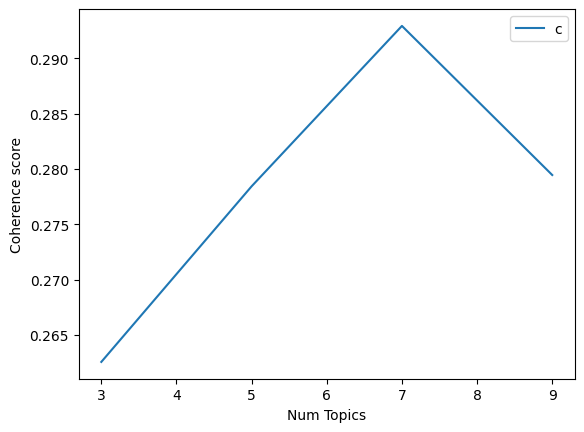

In [ ]:
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

def calculate_coherence_values(dictionary, corpus, texts, limit, start=3, step=2):
    '''
    Compute c_v coherence for various number of topics to find the OPTIMAL NUMBER OF TOPICS.

    Parameters:
              dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              limit : Max num of topics
              start: starting number of topics
              step=n : increase the number by n
    '''

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

tokenized_review = df['tokenized_review'].tolist()

# Can take a while to see the outputs.
model_list, coherence_values = calculate_coherence_values(dictionary=dictionary, corpus=corpus, texts=tokenized_review, start=3, limit=11, step=2)

# Show graph
limit = 11
start = 3
step = 2
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [ ]:
#Find the dominant topic in each document
list_in_list=[]

#for the first 5 documents.
doc_topics = ldamodel.get_document_topics(corpus[:5])
print('document topics: ', doc_topics)

for each_doc in doc_topics:

    #get the assigned topics and list them in terms of their highest to lowest probability.
    top_topic=sorted(each_doc, key=lambda x: x[1], reverse=True)[0]

    #If you want to see the 2nd dominant topic:
    #top_topic_2=sorted(each_doc, key=lambda x: x[1], reverse=True)[1]

    print ("highest",top_topic)

    #select topic number & its probability.
    top_topic_num=top_topic[0]
    top_topic_prob=top_topic[1]

    #make a dataframe and fill out within each column.
    list=[top_topic_num,top_topic_prob]
    list_in_list.extend([list])
    #print (list_in_list)
#create pandas dataframe with column names.
df = pd.DataFrame(list_in_list, columns = ['Dominant Topic', 'Probability'])
pd.set_option("display.max_rows", None, "display.max_columns", None)
print (df)

document topics:  <gensim.interfaces.TransformedCorpus object at 0x7ba517dfe980>
highest (0, 0.39067963)
highest (0, 0.39417842)
highest (0, 0.528935)
highest (5, 0.7126019)
highest (0, 0.5616274)
   Dominant Topic  Probability
0               0     0.390680
1               0     0.394178
2               0     0.528935
3               5     0.712602
4               0     0.561627


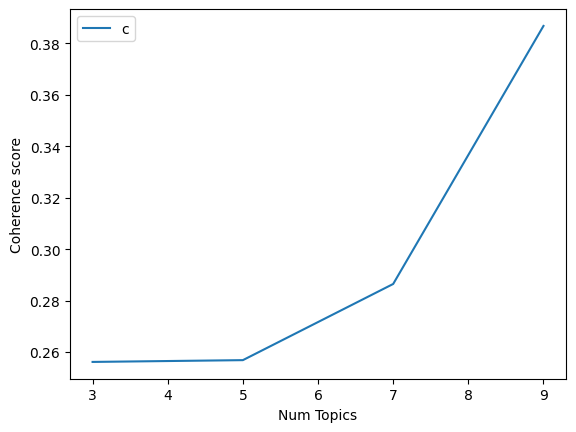

Optimal number of topics: 9


In [ ]:
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

def calculate_coherence_values(dictionary, corpus, texts, limit, start=3, step=2):
    '''
    Compute c_v coherence for various numbers of topics to find the OPTIMAL NUMBER OF TOPICS.

    Parameters:
        dictionary : Gensim dictionary
        corpus : Gensim corpus
        texts : List of input texts
        limit : Max number of topics
        start: Starting number of topics
        step: Increase the number by step
    '''

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        # Use num_topics instead of NUM_TOPICS
        model = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)
        model_list.append(model)

        # Use texts instead of tokenized_doc
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

tokenized_doc = df['tokenized_review'].tolist()

# Can take a while to see the outputs.
model_list, coherence_values = calculate_coherence_values(dictionary=dictionary, corpus=corpus, texts=tokenized_doc, start=3, limit=11, step=2)

# Show graph
limit = 11
start = 3
step = 2
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Find the optimal number of topics
optimal_num_topics_index = coherence_values.index(max(coherence_values))
optimal_num_topics = start + step * optimal_num_topics_index
print(f"Optimal number of topics: {optimal_num_topics}")


In [ ]:
import pandas as pd

list_in_list = []

# For the first 5 documents.
doc_topics = ldamodel.get_document_topics(corpus[:5])

# Iterate through each document
for each_doc in doc_topics:
    # Get the assigned topics and list them in terms of their highest to lowest probability.
    top_topic = sorted(each_doc, key=lambda x: x[1], reverse=True)[0]

    # Select topic number & its probability.
    top_topic_num = top_topic[0]
    top_topic_prob = top_topic[1]

    # Make a list and append it to the list_in_list
    list_in_list.append([top_topic_num, top_topic_prob])

# Create a pandas DataFrame with column names
df = pd.DataFrame(list_in_list, columns=['Dominant Topic', 'Probability'])

# Display the DataFrame
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)


   Dominant Topic  Probability
0               3     0.358959
1               2     0.374779
2               0     0.395505
3               2     0.573007
4               0     0.533013


In [ ]:
# Create a dictionary from the tokenized documents
dictionary = corpora.Dictionary(documents)

# Filter out words that appear in less than 5 documents or more than 50% of the documents
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Create a corpus using the filtered dictionary
corpus = [dictionary.doc2bow(doc) for doc in documents]

# Continue with the rest of your code
NUM_TOPICS = 10

# Fit the LDA model
ldamodel = gensim.models.LdaModel(corpus, num_topics=NUM_TOPICS, id2word=dictionary, passes=15)

# Print the topics with their top keywords
topics = ldamodel.print_topics(num_words=4)  # You can increase the number of keywords
for topic in topics:
    print(topic)

# Continue with the rest of your code, including coherence evaluation and topic assignment


(0, '0.031*"movie" + 0.020*"hunter" + 0.017*"arc" + 0.014*"film"')
(1, '0.020*"bebop" + 0.016*"cowboy" + 0.013*"series" + 0.009*"spike"')
(2, '0.040*"]" + 0.040*"[" + 0.031*"note" + 0.026*"light"')
(3, '0.014*"series" + 0.010*"great" + 0.007*"overall" + 0.007*"plot"')
(4, '0.009*"love" + 0.007*"know" + 0.007*"im" + 0.007*"say"')
(5, '0.006*"game" + 0.006*"arc" + 0.005*"doesnt" + 0.005*"people"')
(6, '0.036*"titan" + 0.018*"parasite" + 0.017*"attack" + 0.015*"human"')
(7, '0.006*"life" + 0.005*"human" + 0.005*"world" + 0.005*"series"')
(8, '0.014*"violet" + 0.011*"series" + 0.010*"geass" + 0.009*"code"')
(9, '0.065*"season" + 0.017*"ghoul" + 0.015*"hero" + 0.013*"manga"')


In [ ]:
import re

for idx, topic in ldamodel.print_topics(-1, num_words=4):
    # Extract keywords without probabilities
    keywords = re.findall(r'"([^"]*)"', topic)

    # Print out topic number and keywords
    print('Topic {}: {}'.format(idx, ', '.join(keywords)))

Topic 0: movie, hunter, arc, film
Topic 1: bebop, cowboy, series, spike
Topic 2: ], [, note, light
Topic 3: series, great, overall, plot
Topic 4: love, know, im, say
Topic 5: game, arc, doesnt, people
Topic 6: titan, parasite, attack, human
Topic 7: life, human, world, series
Topic 8: violet, series, geass, code
Topic 9: season, ghoul, hero, manga


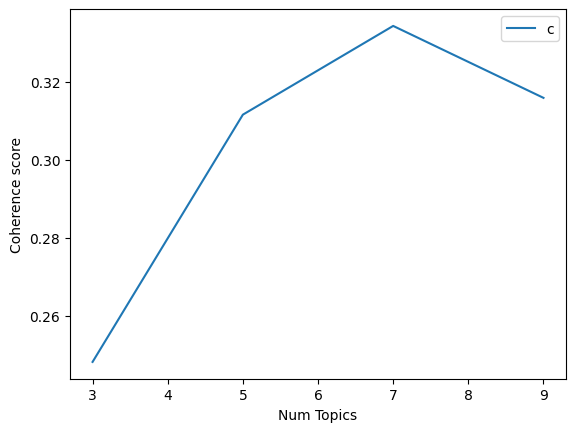

Optimal number of topics: 7


In [ ]:
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

def calculate_coherence_values(dictionary, corpus, texts, limit, start=3, step=2):
    '''
    Compute c_v coherence for various numbers of topics to find the OPTIMAL NUMBER OF TOPICS.

    Parameters:
        dictionary : Gensim dictionary
        corpus : Gensim corpus
        texts : List of input texts
        limit : Max number of topics
        start: Starting number of topics
        step: Increase the number by step
    '''

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        # Use num_topics instead of NUM_TOPICS
        model = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)
        model_list.append(model)

        # Use texts instead of tokenized_doc
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

tokenized_doc = df['tokenized_review'].tolist()

# Can take a while to see the outputs.
model_list, coherence_values = calculate_coherence_values(dictionary=dictionary, corpus=corpus, texts=tokenized_doc, start=3, limit=11, step=2)

# Show graph
limit = 11
start = 3
step = 2
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Find the optimal number of topics
optimal_num_topics_index = coherence_values.index(max(coherence_values))
optimal_num_topics = start + step * optimal_num_topics_index
print(f"Optimal number of topics: {optimal_num_topics}")


In [ ]:
import pandas as pd

list_in_list = []

# For the first 5 documents.
doc_topics = ldamodel.get_document_topics(corpus[:5])

# Iterate through each document
for each_doc in doc_topics:
    # Get the assigned topics and list them in terms of their highest to lowest probability.
    top_topic = sorted(each_doc, key=lambda x: x[1], reverse=True)[0]

    # Select topic number & its probability.
    top_topic_num = top_topic[0]
    top_topic_prob = top_topic[1]

    # Make a list and append it to the list_in_list
    list_in_list.append([top_topic_num, top_topic_prob])

# Create a pandas DataFrame with column names
df = pd.DataFrame(list_in_list, columns=['Dominant Topic', 'Probability'])

# Display the DataFrame
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)


   Dominant Topic  Probability
0               6     0.524039
1               3     0.341037
2               3     0.455774
3               3     0.371813
4               3     0.455273


In [ ]:
import gensim

NUM_TOPICS = 10

# Fit the LDA model
ldamodel = gensim.models.LdaModel(corpus, num_topics=NUM_TOPICS, id2word=dictionary, passes=15)

# Print the topics with their top keywords
topics = ldamodel.print_topics(num_words=4)  # You can increase the number of keywords
for topic in topics:
    print(topic)


(0, '0.021*"character" + 0.019*"anime" + 0.011*"one" + 0.011*"show"')
(1, '0.002*"sauske" + 0.001*"shippudean" + 0.001*"iruka" + 0.001*"mizuki"')
(2, '0.016*"de" + 0.015*"que" + 0.015*"la" + 0.007*"e"')
(3, '0.006*"vampire" + 0.004*"shoko" + 0.003*"shoya" + 0.002*"ueno"')
(4, '0.007*"show" + 0.007*"one" + 0.007*"death" + 0.007*"life"')
(5, '0.026*"wa" + 0.023*"anime" + 0.023*"character" + 0.016*"story"')
(6, '0.016*"character" + 0.012*"show" + 0.011*"series" + 0.009*"one"')
(7, '0.066*"game" + 0.026*"sora" + 0.023*"shiro" + 0.022*"`"')
(8, '0.017*"character" + 0.013*"show" + 0.012*"like" + 0.010*"wa"')
(9, '0.062*"season" + 0.020*"wa" + 0.018*"titan" + 0.017*"arc"')


In [ ]:
import re

for idx, topic in ldamodel.print_topics(-1, num_words=4):
    # Extract keywords without probabilities
    keywords = re.findall(r'"([^"]*)"', topic)

    # Print out topic number and keywords
    print('Topic {}: {}'.format(idx, ', '.join(keywords)))

Topic 0: character, anime, one, show
Topic 1: sauske, shippudean, iruka, mizuki
Topic 2: de, que, la, e
Topic 3: vampire, shoko, shoya, ueno
Topic 4: show, one, death, life
Topic 5: wa, anime, character, story
Topic 6: character, show, series, one
Topic 7: game, sora, shiro, `
Topic 8: character, show, like, wa
Topic 9: season, wa, titan, arc


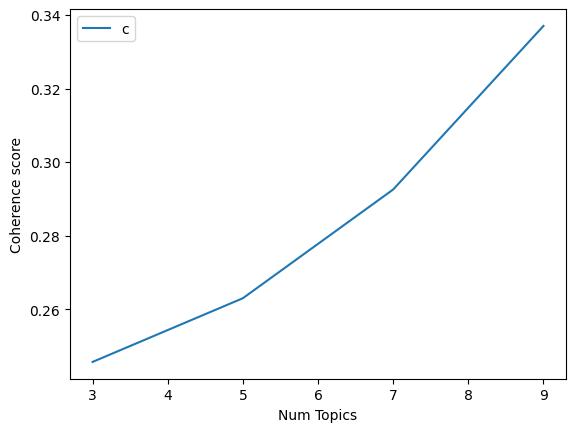

Optimal number of topics: 9


In [ ]:
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

def calculate_coherence_values(dictionary, corpus, texts, limit, start=3, step=2):
    '''
    Compute c_v coherence for various numbers of topics to find the OPTIMAL NUMBER OF TOPICS.

    Parameters:
        dictionary : Gensim dictionary
        corpus : Gensim corpus
        texts : List of input texts
        limit : Max number of topics
        start: Starting number of topics
        step: Increase the number by step
    '''

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        # Use num_topics instead of NUM_TOPICS
        model = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)
        model_list.append(model)

        # Use texts instead of tokenized_doc
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

tokenized_doc = df['tokenized_review'].tolist()

# Can take a while to see the outputs.
model_list, coherence_values = calculate_coherence_values(dictionary=dictionary, corpus=corpus, texts=tokenized_doc, start=3, limit=11, step=2)

# Show graph
limit = 11
start = 3
step = 2
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Find the optimal number of topics
optimal_num_topics_index = coherence_values.index(max(coherence_values))
optimal_num_topics = start + step * optimal_num_topics_index
print(f"Optimal number of topics: {optimal_num_topics}")



In [ ]:
import pandas as pd

list_in_list = []

# For the first 5 documents.
doc_topics = ldamodel.get_document_topics(corpus[:5])

# Iterate through each document
for each_doc in doc_topics:
    # Get the assigned topics and list them in terms of their highest to lowest probability.
    top_topic = sorted(each_doc, key=lambda x: x[1], reverse=True)[0]

    # Select topic number & its probability.
    top_topic_num = top_topic[0]
    top_topic_prob = top_topic[1]

    # Make a list and append it to the list_in_list
    list_in_list.append([top_topic_num, top_topic_prob])

# Create a pandas DataFrame with column names
df = pd.DataFrame(list_in_list, columns=['Dominant Topic', 'Probability'])

# Display the DataFrame
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(df)


   Dominant Topic  Probability
0               6     0.284753
1               5     0.358205
2               5     0.402211
3               6     0.488893
4               5     0.530123


In [ ]:
print(df.columns)


Index(['Dominant Topic', 'Probability'], dtype='object')
